### Library

In [2]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

import warnings
warnings.filterwarnings("error")

#for window
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# for ubuntu
#plt.rcParams["font.family"] = 'NanumBarunGothic'

#plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

### Color Reference

In [3]:
# Color Reference
TV_colors = ['rosybrown', 'lightcoral', 'indianred', 'brown']
PC_colors = ['goldenrod', 'goldenrod', 'gold', 'khaki']
microwave = ['lighseagreen', 'aqua', 'turquoise', 'lightcyan']
air_fryer = ['yellowgreen', 'chartreuse', 'palegreen', 'lightgreen', 'darkseagreen']
hair_dryer = ['mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet']
airconditioner = ['violet', 'hotpink']

### Functions

In [24]:
def load_df(dong,ho):
        
    real_power_file_name = 'new_data/' + dong + "_" + ho + '_appliances(real)_environment(real)_and_houseload(cum).csv'
    cum_power_file_name = 'data/CCM/' + dong + "_" + ho + '_appliances(cum)_and_houseload(cum).csv'

    df_real_appliance = pd.read_csv(real_power_file_name, index_col='Unnamed: 0', infer_datetime_format=True)
    df_real_appliance.index = pd.to_datetime(df_real_appliance.index)

    df_cum_appliance = pd.read_csv(cum_power_file_name, index_col='Unnamed: 0', infer_datetime_format=True)
    df_cum_appliance.index = pd.to_datetime(df_cum_appliance.index)

    ccm_columns = df_cum_appliance.columns[:-1]

    return df_real_appliance, df_cum_appliance, ccm_columns


# Color Setting
def color_setting(ccm_columns):
    color_set = {"PMM" : 'gray',
            "TV" : 'rosybrown',
            "공기청정기" : 'lightpink',
            "PC" : 'goldenrod',
            "밥솥" : 'turquoise',
            "전기밥솥" : 'turquoise',
            "에어컨" : 'violet',
            "선풍기" : 'steelblue',
            "선풍기2" : 'steelblue',
            "선풍기3" : 'steelblue',
            "세탁기" : 'orange'}

    colors = {}

    for col in ccm_columns:
        # print(col)
        if col[:col.find('(')] in color_set:
            # print(color_set[col[:col.find('(')]]+"\n")
            colors[col] = color_set[col[:col.find('(')]]
        else:
            # print("wheat\n")
            colors[col] ="wheat"
    return colors


def plot_monthly(df_cum_appliance,ccm_columns,colors):
    monthly_appliance_usage = df_cum_appliance[ccm_columns].groupby([df_cum_appliance.index.year, df_cum_appliance.index.month]).max()

    plt.figure(figsize=(20, 7))
    ax = monthly_appliance_usage.plot(kind='barh', stacked=True, title=f"{dong}-{ho} : 월별 가전기기 사용량", 
                                    rot=0, figsize=(20, 7), fontsize=20,
                                    color=colors,align='edge', edgecolor='#eee')

    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=45)

    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.box(True)
    plt.show()


def analysis(dong,ho):
    df_real_appliance, df_cum_appliance, ccm_columns = load_df(dong,ho)
    colors = color_setting(ccm_columns)
    plot_monthly(df_cum_appliance,ccm_columns,colors)
    
    usm_li = []
    for item in df_real_appliance.columns:
        if 'presence' in item:
            usm_li.append(item)

    display(usm_li)

In [25]:
dong_li = ['102_702',
           '102_709',
           '102_901',
           '102_908',
           '102_1007']

### 102동 702호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

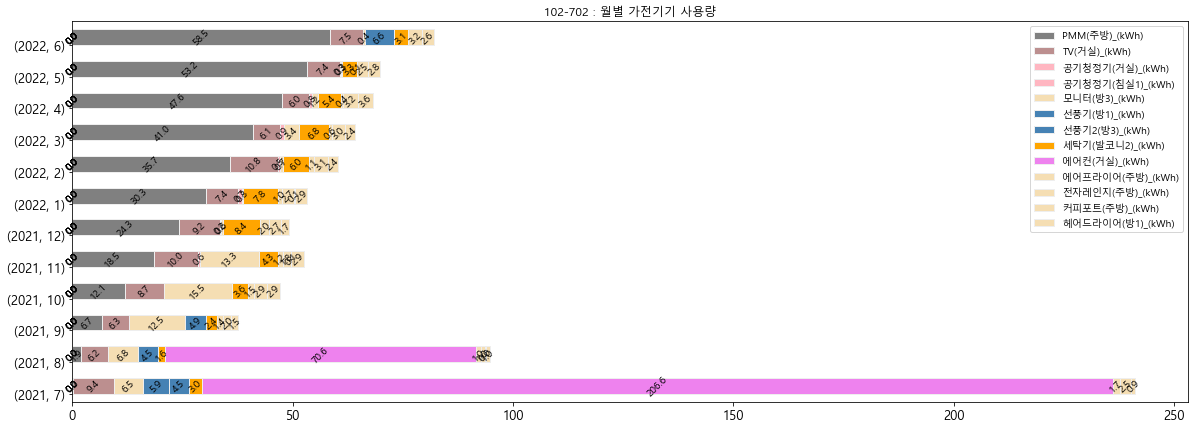

['presence_USM(거실)', 'presence_USM(방1)', 'presence_USM(침실2)']

In [26]:
dong = '102'
ho = '702'
analysis(dong,ho)

#### List Up

---
1. 상위 3개 Appliance
    * TV(거실)      ->      USM(거실)
    * 선풍기        ->      USM(방1) (방3에 대한 USM 존재 X)
    * 모니터        ->      USM(방3) (여기도 방3 USM 없음)      

#### TV : 불필요한 에너지 소비 EDA

In [144]:
df_real_appliance.head()

,PMM(주방),TV(거실),공기청정기(거실),모니터(방3),선풍기(방1),세탁기(발코니2),에어프라이어(주방),전자레인지(주방),커피포트(주방),헤어드라이어(방1),presence_USM(거실),presence_USM(방1),presence_USM(침실2),humidity_USM(거실),humidity_USM(방1),humidity_USM(침실2),temperature_USM(거실),temperature_USM(방1),temperature_USM(침실2),power_this_month
2022-05-01 00:00:00,0.0,0.8,1.6,0.9,NaN,0.7,0.7,0.5,0.6,0.7,0.0,0.0,0.0,41.0,43.0,43.0,24.400000,24.5,24.2,4853.514
2022-05-01 00:05:00,0.0,0.6,1.4,1.0,NaN,0.7,0.8,0.5,0.8,0.8,0.0,0.0,0.0,41.0,43.0,43.0,24.400000,24.5,24.2,NaN
2022-05-01 00:10:00,0.0,1.1,1.4,0.8,NaN,0.7,0.7,0.4,0.8,0.8,0.0,0.0,0.0,41.0,43.0,43.0,24.400000,24.5,24.2,NaN
2022-05-01 00:15:00,0.0,0.7,1.4,0.8,NaN,0.5,0.7,0.7,0.8,0.6,0.0,0.0,0.0,41.0,43.0,43.0,24.400000,24.5,24.2,4853.566
2022-05-01 00:20:00,0.0,0.8,1.5,0.6,NaN,0.7,0.8,0.5,0.7,0.8,0.0,0.0,0.0,41.0,43.0,43.0,24.383333,24.5,24.2,NaN


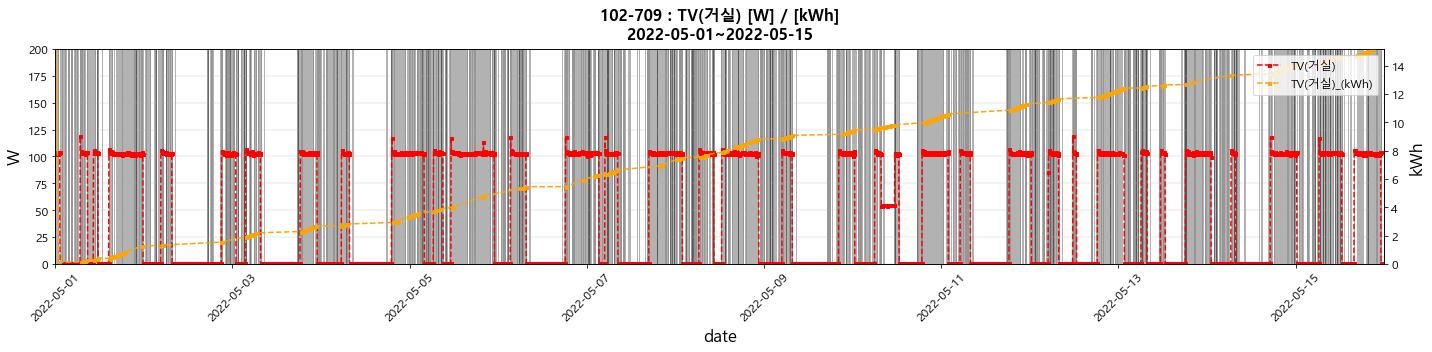

재실유무를 고려 X 사용량 : 17.183 kWh
재실유무를 고려 O 사용량 : 10.666 kWh
절감율 : 37.93


In [188]:
# 시각화 및 전력량 계산을 위한 시간 설정
start_time = "2022-05-01"
end_time = "2022-05-15 23:59:59"


# csv에 저장된 column을 반드시 매칭시켜야함
real_power_appliance = "TV(거실)" 
cum_power_appliance = "TV(거실)_(kWh)"
presence_USM = "presence_USM(거실)"

from matplotlib.ticker import MultipleLocator

# 60 mins
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
# 순시전력
lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=real_power_appliance)

# 재실유무 패턴 시각화
ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
                 where=df_real_appliance[presence_USM] == 1,
                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                 label="Presence")

ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 200)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

# 누적전력량 시각화
lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=cum_power_appliance)

ax2.set_ylabel('kWh', fontsize=17)
ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2 #+lns3

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", fontsize=12)
#ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/(1000*12)#*(0.85)
to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12*(0.85)

print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### 셋톱박스(거실) : 불필요한 에너지 소비 EDA

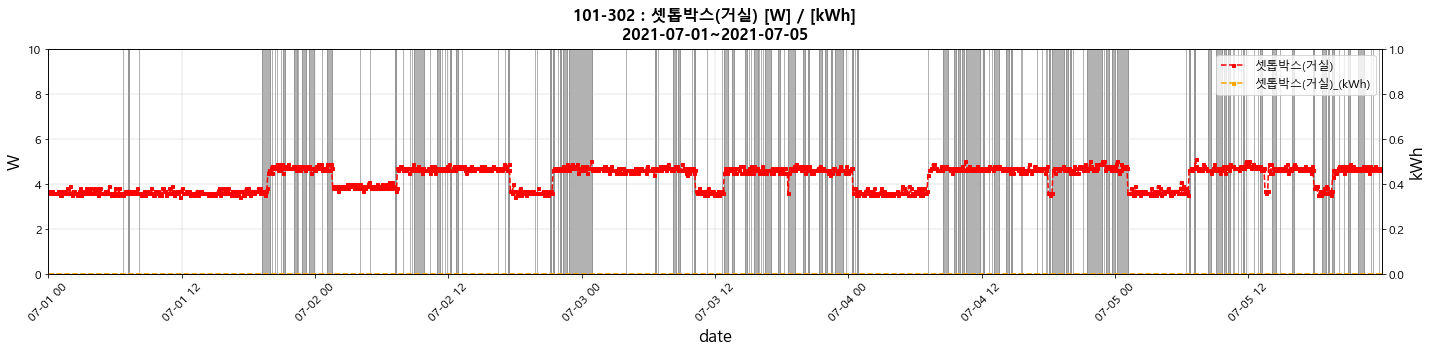

재실유무를 고려 X 사용량 : 0.436 kWh
재실유무를 고려 O 사용량 : 0.132 kWh
절감율 : 69.84


In [155]:
start_time = "2021-07-01"
end_time = "2021-07-05 23:59:59"

real_power_appliance = "셋톱박스(거실)"
cum_power_appliance = "셋톱박스(거실)_(kWh)"
presence_USM = "presence_USM(거실)"

from matplotlib.ticker import MultipleLocator

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
# 순시전력
lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=real_power_appliance)

# 재실유무
ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
                 where=df_real_appliance[presence_USM] == 1,
                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                 label="Presence")

ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 10)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

# 누적전력량
lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=cum_power_appliance)

ax2.set_ylabel('kWh', fontsize=17)
ax2.set_ylim([0, 1])
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2 #+lns3

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", fontsize=12)
#ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/1000/12*(0.85)
to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12*(0.85)

print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### 세탁기 : 이웃과 사용패턴 비교 (skip)

In [306]:
# 비교 세대 데이터
# 101-301 (세탁기 X)
real_power_file_name_101_301 = 'new_data/' + "101" + "_" + "301" + '_appliances(real)_environment(real)_and_houseload(cum).csv'
cum_power_file_name_101_301 = 'data/' + "101" + "_" + "301" + '_appliances(cum)_and_houseload(cum).csv'

df_real_appliance_101_301 = pd.read_csv(real_power_file_name_101_301, index_col='Unnamed: 0', infer_datetime_format=True)
df_real_appliance_101_301.index = pd.to_datetime(df_real_appliance_101_301.index)

df_cum_appliance_101_301 = pd.read_csv(cum_power_file_name_101_301, index_col='Unnamed: 0', infer_datetime_format=True)
df_cum_appliance_101_301.index = pd.to_datetime(df_cum_appliance_101_301.index)

# 101-402
real_power_file_name_101_402 = 'new_data/' + "101" + "_" + "402" + '_appliances(real)_environment(real)_and_houseload(cum).csv'
cum_power_file_name_101_402 = 'data/' + "101" + "_" + "402" + '_appliances(cum)_and_houseload(cum).csv'

df_real_appliance_101_402 = pd.read_csv(real_power_file_name_101_402, index_col='Unnamed: 0', infer_datetime_format=True)
df_real_appliance_101_402.index = pd.to_datetime(df_real_appliance_101_402.index)

df_cum_appliance_101_402 = pd.read_csv(cum_power_file_name_101_402, index_col='Unnamed: 0', infer_datetime_format=True)
df_cum_appliance_101_402.index = pd.to_datetime(df_cum_appliance_101_402.index)

# 101-502
real_power_file_name_101_502 = 'new_data/' + "101" + "_" + "502" + '_appliances(real)_environment(real)_and_houseload(cum).csv'
cum_power_file_name_101_502 = 'data/' + "101" + "_" + "502" + '_appliances(cum)_and_houseload(cum).csv'

df_real_appliance_101_502 = pd.read_csv(real_power_file_name_101_502, index_col='Unnamed: 0', infer_datetime_format=True)
df_real_appliance_101_502.index = pd.to_datetime(df_real_appliance_101_502.index)

df_cum_appliance_101_502 = pd.read_csv(cum_power_file_name_101_502, index_col='Unnamed: 0', infer_datetime_format=True)
df_cum_appliance_101_502.index = pd.to_datetime(df_cum_appliance_101_502.index)

# 101-702
real_power_file_name_101_702 = 'new_data/' + "101" + "_" + "702" + '_appliances(real)_environment(real)_and_houseload(cum).csv'
cum_power_file_name_101_702 = 'data/' + "101" + "_" + "702" + '_appliances(cum)_and_houseload(cum).csv'

df_real_appliance_101_702 = pd.read_csv(real_power_file_name_101_702, index_col='Unnamed: 0', infer_datetime_format=True)
df_real_appliance_101_702.index = pd.to_datetime(df_real_appliance_101_702.index)

df_cum_appliance_101_702 = pd.read_csv(cum_power_file_name_101_702, index_col='Unnamed: 0', infer_datetime_format=True)
df_cum_appliance_101_702.index = pd.to_datetime(df_cum_appliance_101_702.index)

# 101-1001
real_power_file_name_101_1001 = 'new_data/' + "101" + "_" + "1001" + '_appliances(real)_environment(real)_and_houseload(cum).csv'
cum_power_file_name_101_1001 = 'data/' + "101" + "_" + "1001" + '_appliances(cum)_and_houseload(cum).csv'

df_real_appliance_101_1001 = pd.read_csv(real_power_file_name_101_1001, index_col='Unnamed: 0', infer_datetime_format=True)
df_real_appliance_101_1001.index = pd.to_datetime(df_real_appliance_101_1001.index)

df_cum_appliance_101_1001 = pd.read_csv(cum_power_file_name_101_1001, index_col='Unnamed: 0', infer_datetime_format=True)
df_cum_appliance_101_1001.index = pd.to_datetime(df_cum_appliance_101_1001.index)

# 101-1802 (세탁기 X)
real_power_file_name_101_1802 = 'new_data/' + "101" + "_" + "1802" + '_appliances(real)_environment(real)_and_houseload(cum).csv'
cum_power_file_name_101_1802 = 'data/' + "101" + "_" + "1802" + '_appliances(cum)_and_houseload(cum).csv'

df_real_appliance_101_1802 = pd.read_csv(real_power_file_name_101_1802, index_col='Unnamed: 0', infer_datetime_format=True)
df_real_appliance_101_1802.index = pd.to_datetime(df_real_appliance_101_1802.index)

df_cum_appliance_101_1802 = pd.read_csv(cum_power_file_name_101_1802, index_col='Unnamed: 0', infer_datetime_format=True)
df_cum_appliance_101_1802.index = pd.to_datetime(df_cum_appliance_101_1802.index)


In [319]:
df_temp_302 = df_real_appliance[[i for i in df_real_appliance.columns if '세탁기(' in i]]

df_temp_301 = df_real_appliance_101_301[[i for i in df_real_appliance_101_301.columns if '세탁기' in i]]
df_temp_402 = df_real_appliance_101_402[[i for i in df_real_appliance_101_402.columns if '세탁기' in i]]
df_temp_502 = df_real_appliance_101_502[[i for i in df_real_appliance_101_502.columns if '세탁기' in i]]
df_temp_702 = df_real_appliance_101_702[[i for i in df_real_appliance_101_702.columns if '세탁기' in i]]
df_temp_1001 = df_real_appliance_101_1001[[i for i in df_real_appliance_101_1001.columns if '세탁기' in i]]

In [320]:
# 해당 세대
df_temp_302 = df_temp_302.fillna(0)

# 비교 세대
df_temp_301 = df_temp_301.fillna(0)
df_temp_402 = df_temp_402.fillna(0)
df_temp_502 = df_temp_502.fillna(0)
df_temp_702 = df_temp_702.fillna(0)
df_temp_1001 = df_temp_1001.fillna(0)

In [315]:
# temp1 = pd.merge(df_temp_302, df_temp_402, left_index=True, right_index=True, how='left')
# temp2 = pd.merge(temp1, df_temp_502, left_index=True, right_index=True, how='left')
# washing_machine = temp2[start_time:end_time].groupby([temp2[start_time:end_time].index.weekday]).sum()
# fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))
# sns.heatmap(washing_machine.T, cmap='RdYlGn_r')

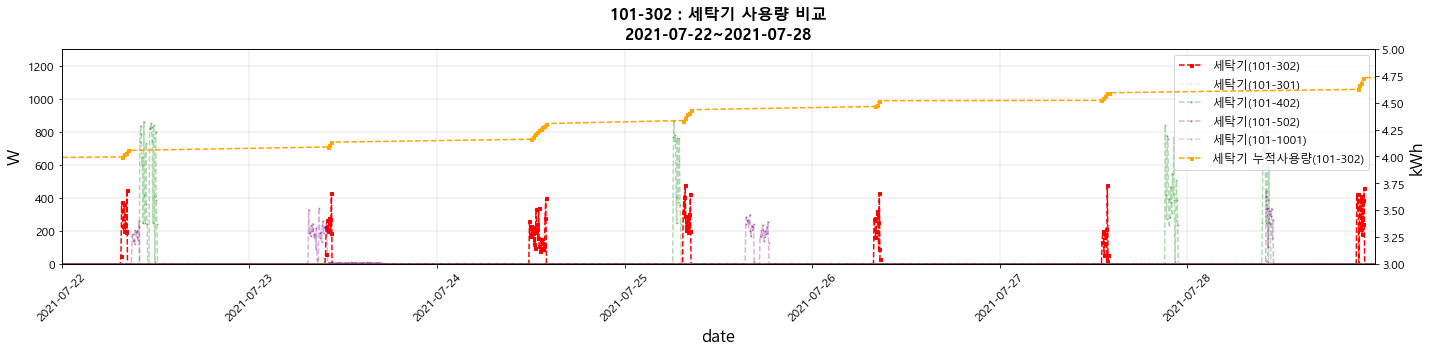

기존 생활 습관에서의 세탁기 사용량 : 0.722 kWh
개선된 생활 습관에서의 세탁기 사용량 : 0.477 kWh
절감율 : 33.83


In [457]:
# ['mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet']

start_time = "2021-07-22"
end_time = "2021-07-28 23:59:59"

real_power_appliance = "세탁기(발코니2)_(W)"
cum_power_appliance = "세탁기(발코니2)_(kWh)"

from matplotlib.ticker import MultipleLocator

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
lns1 = ax1.plot(df_temp_302.dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label="세탁기(101-302)")


lns2 = ax1.plot(df_temp_301.dropna(), 
                color='pink', 
                marker = 's',
                markersize=1,
                linestyle = "dashed",
                alpha = 0.3,
                label="세탁기(101-301)")

lns3 = ax1.plot(df_temp_402.dropna(), 
                color='green', 
                marker = 's',
                markersize=1,
                linestyle = "dashed",
                alpha = 0.3,           
                label="세탁기(101-402)")

lns4 = ax1.plot(df_temp_502.dropna(), 
                color='purple', 
                marker = 's',
                markersize=1,
                linestyle = "dashed",
                alpha = 0.3,           
                label="세탁기(101-502)")

lns5 = ax1.plot(df_temp_1001.dropna(), 
                color='gray', 
                marker = 's',
                markersize=1,
                linestyle = "dashed",
                alpha = 0.3,           
                label="세탁기(101-1001)")

ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 1300)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : 세탁기 사용량 비교"   +  "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

lns6 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label="세탁기 누적사용량(101-302)")

ax2.set_ylim([3,5])
ax2.set_ylabel('kWh', fontsize=17)
ax2.tick_params(axis = 'y', labelsize = 12)

# # added these two lines
lns = lns1 +lns2+lns3+lns4+lns5+lns6

labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right", fontsize=12)
#ax1.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

#.to_datetime == "datetime.date(2021, 7, 24)"
df_temp_302_tobe = df_temp_302.copy()

df_temp_302_tobe.loc[(df_temp_302_tobe.index.weekday == 5), '세탁기(발코니2)_(W)'] = 0
df_temp_302_tobe.loc[(df_temp_302_tobe.index.weekday == 0), '세탁기(발코니2)_(W)'] = 0

# 사용하지 않는 구간 음영처리
# ax1.fill_between(df_temp_302[start_time:end_time][real_power_appliance].index, 0, 1, 
#                  where=,
#                  color='black', alpha=0.3, transform=ax1.get_xaxis_transform())


as_is_power = df_temp_302[start_time:end_time][real_power_appliance].sum()/1000/12*(0.41)
to_be_power = (df_temp_302_tobe[start_time:end_time][real_power_appliance]).sum()/1000/12*(0.41)

print(f"기존 생활 습관에서의 세탁기 사용량 : {round(as_is_power,3)} kWh")
print(f"개선된 생활 습관에서의 세탁기 사용량 : {round(to_be_power,3)} kWh")
print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

### 102동 709호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

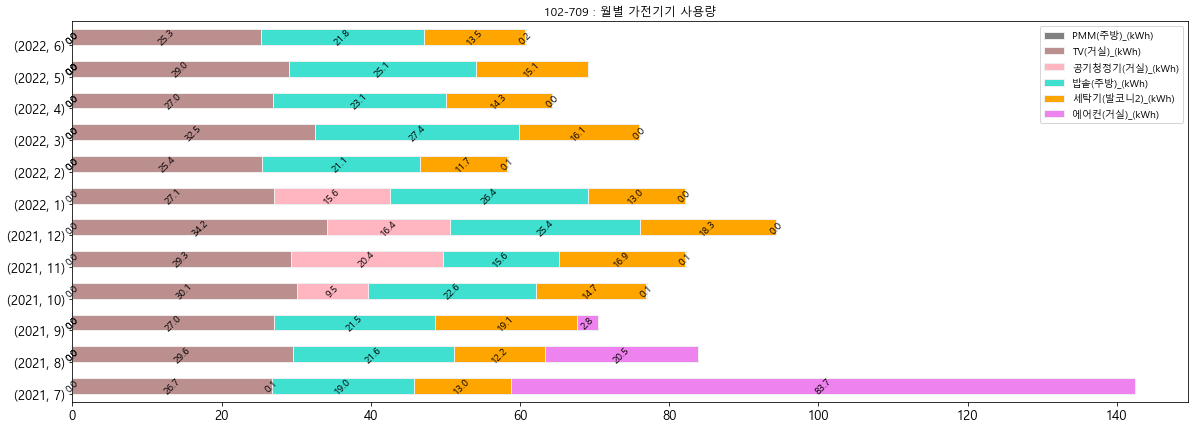

['presence_USM(거실)',
 'presence_USM(방1)',
 'presence_USM(침실2)',
 'presence_USM(침실3)']

In [27]:
dong = '102'
ho = '709'
analysis(dong,ho)

#### TV : 불필요한 에너지 소비 EDA

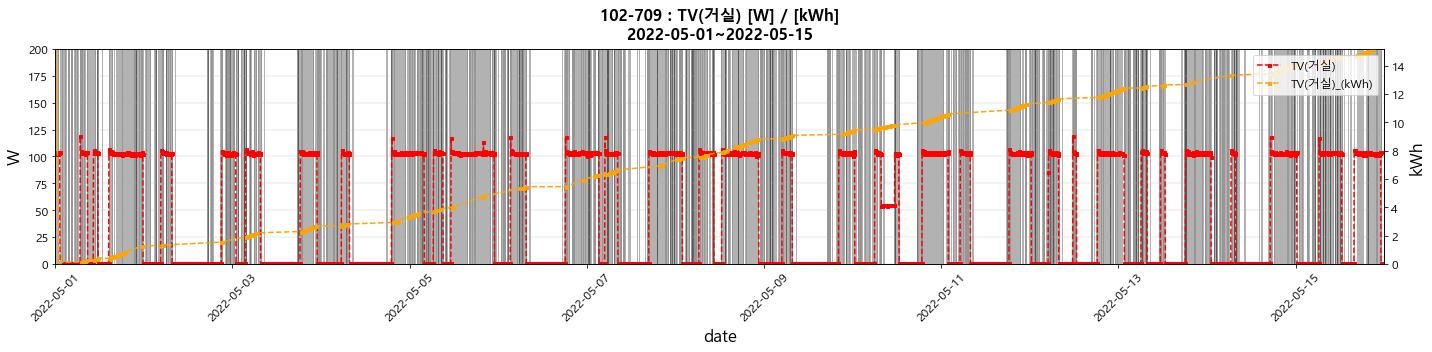

재실유무를 고려 X 사용량 : 14.606 kWh
재실유무를 고려 O 사용량 : 10.666 kWh
절감율 : 26.97


In [189]:
# 시각화 및 전력량 계산을 위한 시간 설정
start_time = "2022-05-01"
end_time = "2022-05-15 23:59:59"

# csv에 저장된 column을 반드시 매칭시켜야함
real_power_appliance = "TV(거실)"
cum_power_appliance = "TV(거실)_(kWh)"
presence_USM = "presence_USM(거실)"

from matplotlib.ticker import MultipleLocator

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
# 순시전력
lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=real_power_appliance)

# 재실유무
ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
                 where=df_real_appliance[presence_USM] == 1,
                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                 label="Presence")

ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 200)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=cum_power_appliance)



# lns2 = ax2.step(df_real_appliance[presence_USM].dropna().index, 
#                 df_real_appliance[presence_USM].dropna().values, 
#                 color='gray', 
#                 marker = 'o', 
#                 markersize=0.15,
#                 alpha=0.5,
#                 linestyle = "dashed",
#                 label='presence or absence')

ax2.set_ylabel('kWh', fontsize=17)
ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2 #+lns3

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", fontsize=12)
#ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/1000/12*(0.85)
to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12*(0.85)

print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### 전기밥솥 : 불필요한 에너지 소비 EDA

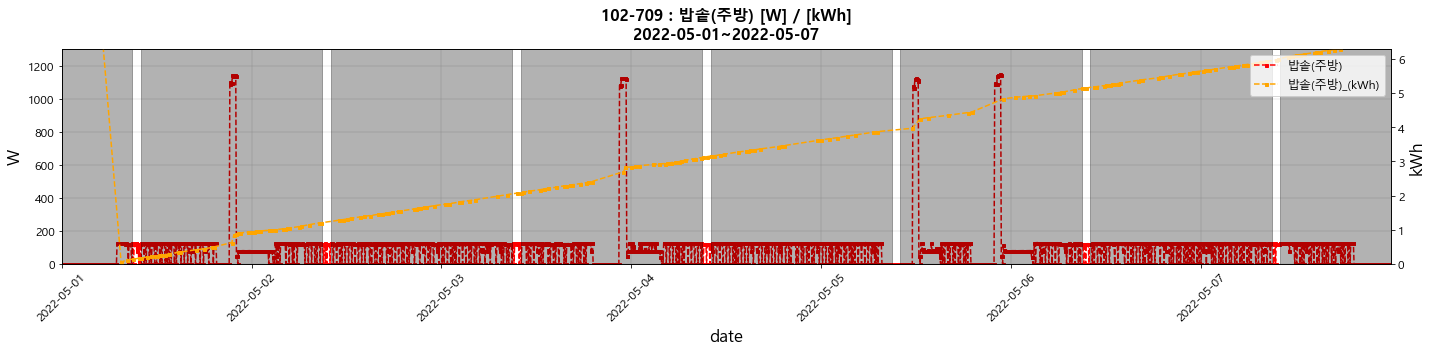

재실유무를 고려 X 사용량 : 2.07 kWh
재실유무를 고려 O 사용량 : 0.487 kWh
절감율 : 76.47


In [193]:
# 시각화 및 전력량 계산을 위한 시간 설정
start_time = "2022-05-01"
end_time = "2022-05-07 23:59:59"

# csv에 저장된 column을 반드시 매칭시켜야함
real_power_appliance = "밥솥(주방)"
cum_power_appliance = "밥솥(주방)_(kWh)"
#presence_USM = "presence_USM(거실)"

from matplotlib.ticker import MultipleLocator

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=real_power_appliance)

ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 1300)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

# 누적전력량
lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=cum_power_appliance)


# 취사기간을 9시~10시로 가정, 이외의 시간은 모두 보온으로 판단되므로 0으로 설정
df_temp_402_tobe = df_real_appliance[[real_power_appliance]].copy()

df_temp_402_tobe.loc[(df_temp_402_tobe.index.hour == 9), '취사시간판별'] = 1
df_temp_402_tobe.loc[(df_temp_402_tobe.index.hour != 9), '취사시간판별'] = 0


# 취사구간 및 보온구간 시각화
ax2.fill_between(df_temp_402_tobe['취사시간판별'].index, 0, 1, 
                 where=df_temp_402_tobe['취사시간판별'] == 0,
                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                 label="보온")

ax2.set_ylabel('kWh', fontsize=17)
ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2 #+lns3

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()

as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/1000/12*(0.12)
to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_temp_402_tobe[start_time:end_time]['취사시간판별']).sum()/1000/12*(0.85)

print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### PC : 불필요한 에너지 소비 EDA

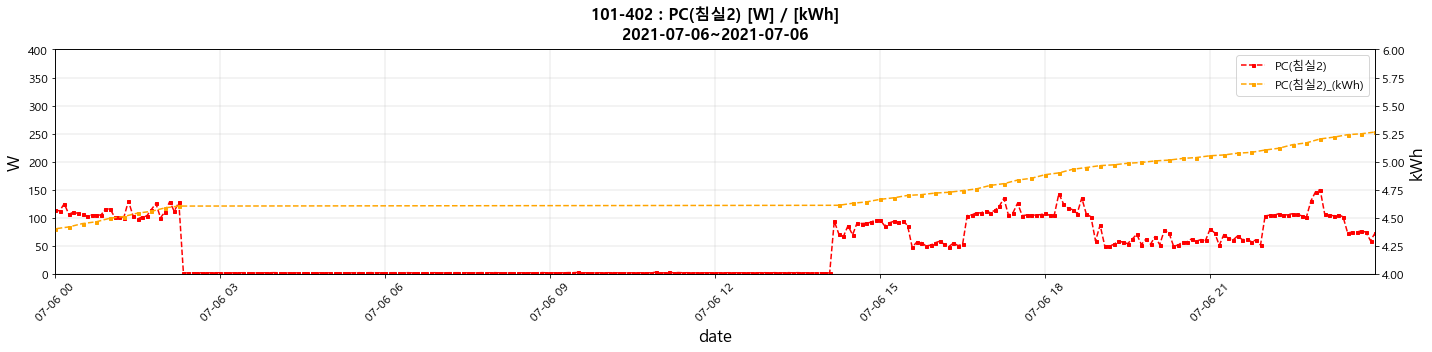

누적사용량 : 0.85 kWh
식사 및 취침시간 PC On에 대한 사용량 : 0.848 kWh
식사 및 취침시간 PC Off에 대한 사용량 : 0.565 kWh
절감율 : 33.42


In [49]:
# 시각화 및 전력량 계산을 위한 시간 설정
start_time = "2022-05-01"
end_time = "2022-05-07 23:59:59"

# csv에 저장된 column을 반드시 매칭시켜야함
real_power_appliance = "PC(침실2)"
cum_power_appliance = "PC(침실2)_(kWh)"
presence_USM = "presence_USM(방2)"

from matplotlib.ticker import MultipleLocator

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=real_power_appliance)

# 재실유무 시각화
ax1.fill_between(df_real_appliance[presence_USM].index, 0, 5, 
                 where=df_real_appliance[presence_USM] == 0,
                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                 label="Presence")


ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 400)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=cum_power_appliance)

ax2.set_ylabel('kWh', fontsize=17)
ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2 #+lns3

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", fontsize=12)
#ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

# 저녁시간 및 새벽에는 PC off로 설정!
df_temp_402_tobe = df_real_appliance[[real_power_appliance]].copy()

df_temp_402_tobe.loc[(df_temp_402_tobe.index.hour == 18), 'rest_time'] = 0
df_temp_402_tobe.loc[(df_temp_402_tobe.index.hour != 18), 'rest_time'] = 1

df_temp_402_tobe.loc[(df_temp_402_tobe.index.hour == 0), 'rest_time'] = 0
df_temp_402_tobe.loc[(df_temp_402_tobe.index.hour == 1), 'rest_time'] = 0
df_temp_402_tobe.loc[(df_temp_402_tobe.index.hour == 2), 'rest_time'] = 0

df_real_appliance[start_time:end_time][real_power_appliance].max
as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/1000/12*(0.77)
to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_temp_402_tobe[start_time:end_time]['rest_time']).sum()/1000/12*(0.77)

difference = df_cum_appliance[start_time:end_time][cum_power_appliance].max() - df_cum_appliance[start_time:end_time][cum_power_appliance].min()

print(f"누적사용량 : {round(difference, 2)} kWh")
print(f"식사 및 취침시간 PC On에 대한 사용량 : {round(as_is_power,3)} kWh")
print(f"식사 및 취침시간 PC Off에 대한 사용량 : {round(to_be_power,3)} kWh")
print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

### 102동 901호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

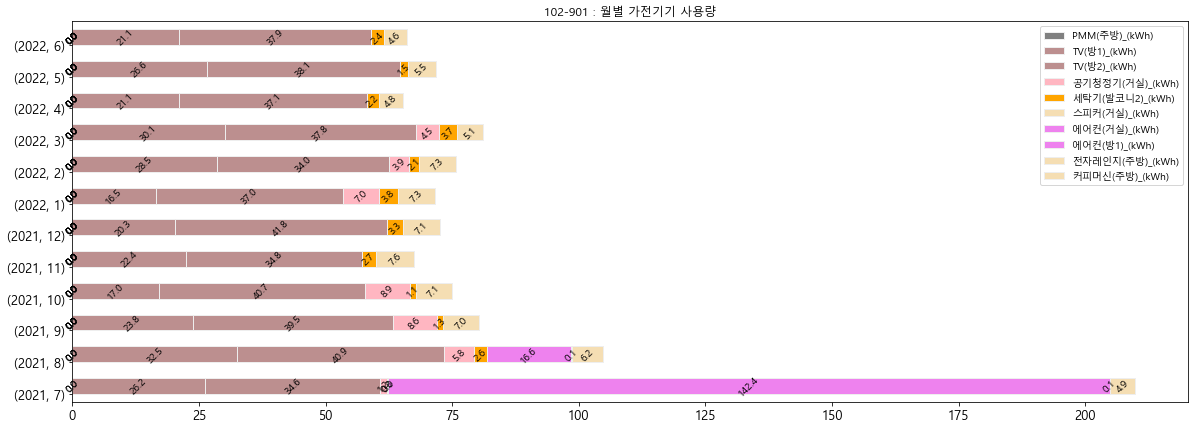

['presence_USM(거실)',
 'presence_USM(방1)',
 'presence_USM(침실2)',
 'presence_USM(침실3)']

In [28]:
dong = '102'
ho = '901'
analysis(dong,ho)

#### TV(거실) : 불필요한 에너지 소비 EDA

In [ ]:
def eda(start_time,end_time,appliance,room):

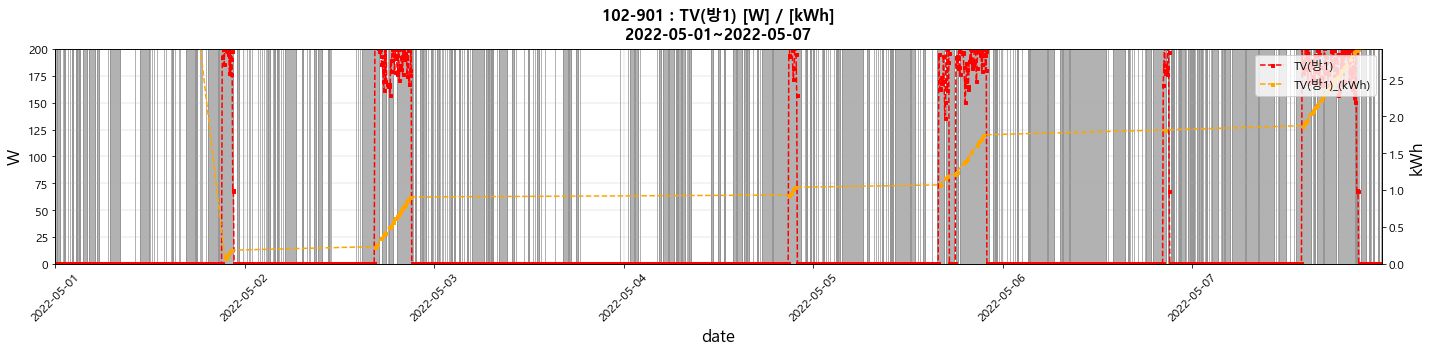

재실유무를 고려 X 사용량 : 3.297 kWh
재실유무를 고려 O 사용량 : 2.887 kWh
절감율 : 12.44


In [215]:
# 시각화 및 전력량 계산을 위한 시간 설정
start_time = "2022-05-01"
end_time = "2022-05-07 23:59:59"

# csv에 저장된 column을 반드시 매칭시켜야함
real_power_appliance = "TV(방1)"
cum_power_appliance = "TV(방1)_(kWh)"
presence_USM = "presence_USM(방1)"

from matplotlib.ticker import MultipleLocator

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=real_power_appliance)

# 재실뮤우 시각화를 위함
ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
                 where=df_real_appliance[presence_USM] == 1,
                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                 label="Presence")

ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 200)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

# 누적전력량
lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=cum_power_appliance)


ax2.set_ylabel('kWh', fontsize=17)
ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2 #+lns3

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", fontsize=12)
#ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/1000/12*(0.85)
to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12*(0.85)

print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### TV(침실1) : 불필요한 에너지 소비 EDA

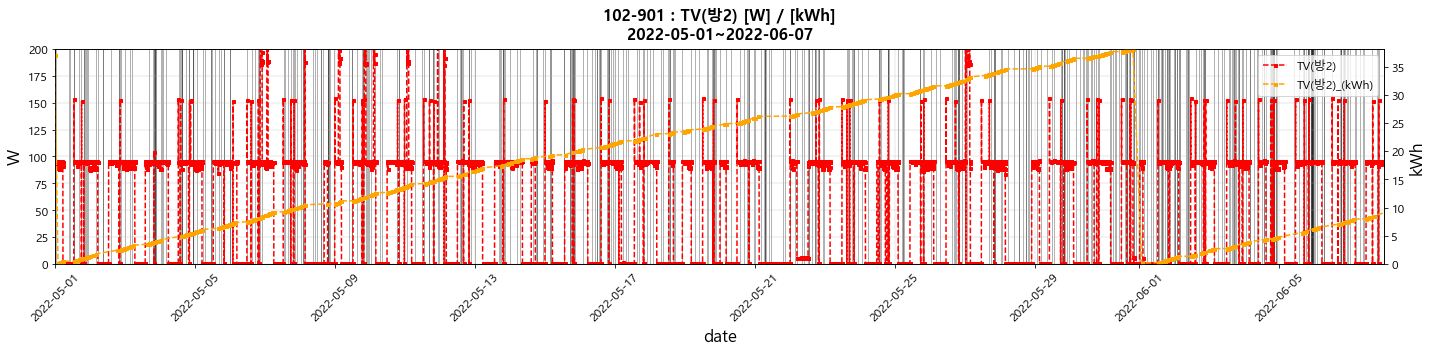

재실유무를 고려 X 사용량 : 52.729 kWh
재실유무를 고려 O 사용량 : 2.771 kWh
절감율 : 94.74


In [218]:
start_time = "2022-05-01"
end_time = "2022-06-07 23:59:59"

real_power_appliance = "TV(방2)"
cum_power_appliance = "TV(방2)_(kWh)"
presence_USM = "presence_USM(침실2)"

from matplotlib.ticker import MultipleLocator

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=real_power_appliance)

# 결측치 구간 음영처리
ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
                 where=df_real_appliance[presence_USM] == 1,
                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                 label="Presence")

ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 200)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=cum_power_appliance)



# lns2 = ax2.step(df_real_appliance[presence_USM].dropna().index, 
#                 df_real_appliance[presence_USM].dropna().values, 
#                 color='gray', 
#                 marker = 'o', 
#                 markersize=0.15,
#                 alpha=0.5,
#                 linestyle = "dashed",
#                 label='presence or absence')

ax2.set_ylabel('kWh', fontsize=17)
ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2 #+lns3

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", fontsize=12)
#ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/1000/12# *(0.85)
to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12#*(0.85)

print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### TV(침실2) : 불필요한 에너지 소비 EDA

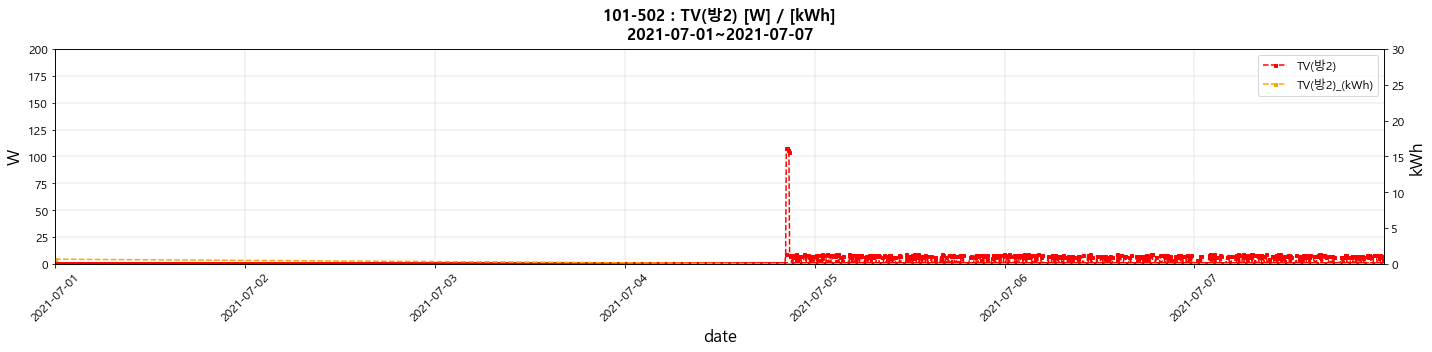

재실유무를 고려 X 사용량 : 0.331 kWh
재실유무를 고려 O 사용량 : 0.0 kWh
절감율 : 100.0


In [15]:
start_time = "2021-07-01"
end_time = "2021-07-07 23:59:59"

real_power_appliance = "TV(방2)"
cum_power_appliance = "TV(방2)_(kWh)"
presence_USM = "presence_USM(침실2)"

from matplotlib.ticker import MultipleLocator

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=real_power_appliance)

# 결측치 구간 음영처리
ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
                 where=df_real_appliance[presence_USM] == 1,
                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                 label="Presence")

ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 200)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=cum_power_appliance)


# lns2 = ax2.step(df_real_appliance[presence_USM].dropna().index, 
#                 df_real_appliance[presence_USM].dropna().values, 
#                 color='gray', 
#                 marker = 'o', 
#                 markersize=0.15,
#                 alpha=0.5,
#                 linestyle = "dashed",
#                 label='presence or absence')

ax2.set_ylabel('kWh', fontsize=17)
ax2.set_ylim([0, 30])
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2 #+lns3

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", fontsize=12)
#ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/1000/12 # *(0.85)
to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12 #*(0.85)

print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### 전기밥솥 : 불필요한 에너지 소비 EDA

- 해당 세대는 밥솥을 **보온** 용도로 사용하고 있는 것으로 추정됨

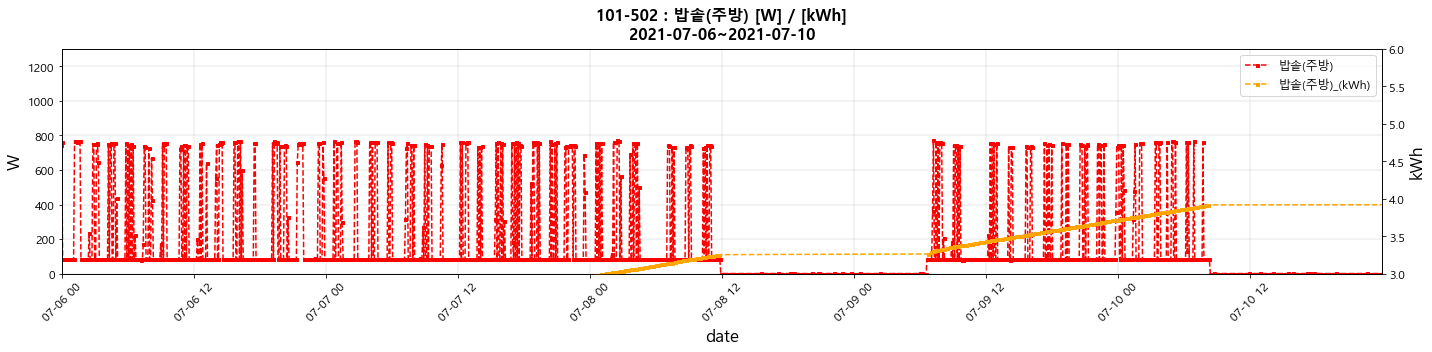

In [20]:
start_time = "2021-07-06 00:00:00"
end_time = "2021-07-10 23:59:59"

real_power_appliance = "밥솥(주방)"
cum_power_appliance = "밥솥(주방)_(kWh)"
#presence_USM = "presence_USM(거실)"

from matplotlib.ticker import MultipleLocator

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

# First Plot
lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                color='red', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=real_power_appliance)

# 결측치 구간 음영처리
ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
                 where=df_real_appliance[presence_USM] == 1,
                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                 label="Presence")

ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_ylim(0, 1300)
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('W', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

# Second Plot
ax2 = ax1.twinx()

lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                color='orange', 
                marker = 's',
                markersize=3,
                linestyle = "dashed",
                label=cum_power_appliance)


# # 결측치 구간 음영처리
# ax2.fill_between(df_temp_402_tobe['취사시간판별'].index, 0, 1, 
#                  where=df_temp_402_tobe['취사시간판별'] == 0,
#                  color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
#                  label="보온")


ax2.set_ylabel('kWh', fontsize=17)
ax2.set_ylim([3, 6])
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2 #+lns3

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", fontsize=12)
#ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()


### 102동 908호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

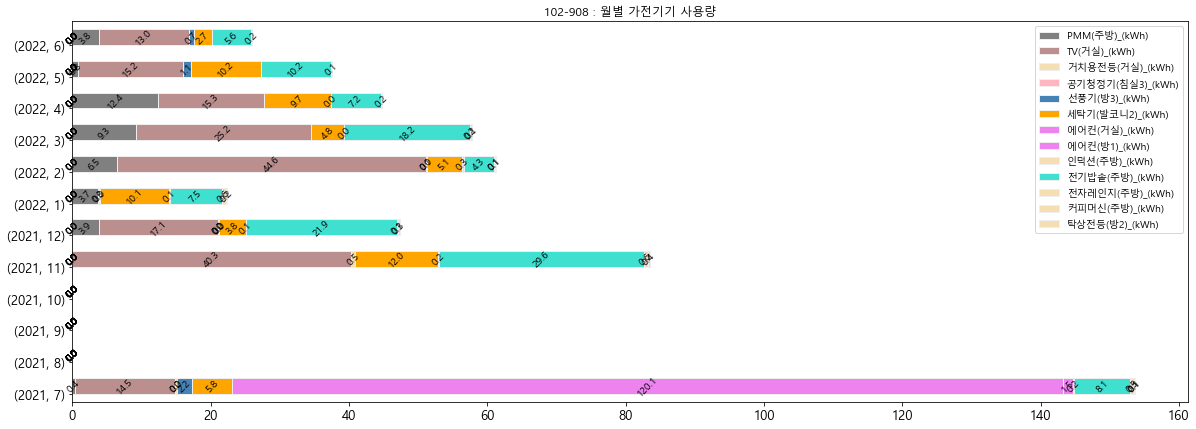

['presence_USM(거실)',
 'presence_USM(방1)',
 'presence_USM(방2)',
 'presence_USM(침실3)']

In [29]:
dong = '102'
ho = '908'
analysis(dong,ho)

### 102동 1007호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

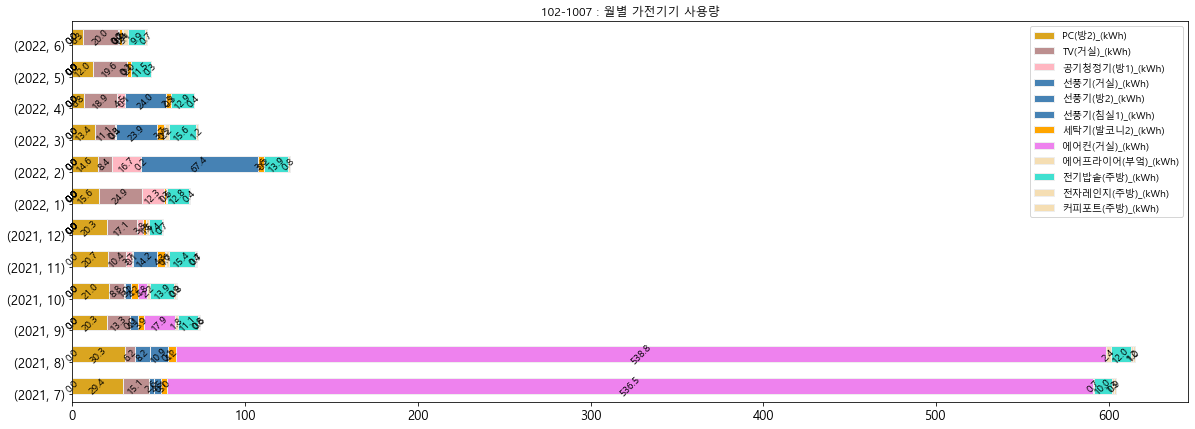

['presence_USM(거실)',
 'presence_USM(방1)',
 'presence_USM(방2)',
 'presence_USM(방3)']

In [30]:
dong = '102'
ho = '1007'
analysis(dong,ho)